In [63]:
# Import libraries
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as dates
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Preprocessing Bank Holidays data

Import data from `.csv` file corresponding to **Bank Holidays** data.

In [64]:
df_fecha = pd.read_csv('../Bank_Holidays/Data/Bank_Holidays_Result.csv', sep = '^')

In [65]:
df_fecha.dtypes

Date             object
Festivo           int64
Fin de semana     int64
dtype: object

Rename DataFrame series.

In [66]:
df_fecha.columns = ['Fecha', 'Festivo', 'Fin de semana']

In [67]:
df_fecha.dtypes

Fecha            object
Festivo           int64
Fin de semana     int64
dtype: object

`'Date'` serie is object type. It's necessary to cast `'Date'` serie to datetime format.

In [68]:
df_fecha['Fecha'] =pd.to_datetime(df_fecha['Fecha'])

In [69]:
df_fecha.head(3)

,Fecha,Festivo,Fin de semana
0,2014-01-01 00:00:00,1,0
1,2014-01-01 01:00:00,1,0
2,2014-01-01 02:00:00,1,0


In [70]:
df_fecha.tail(3)

,Fecha,Festivo,Fin de semana
35061,2017-12-31 21:00:00,0,1
35062,2017-12-31 22:00:00,0,1
35063,2017-12-31 23:00:00,0,1


#### 2. Preprocessing ESIOS data

Import data from `.csv` files that contains **ESIOS** data.

In [71]:
# Import reduce library
from functools import reduce

In [72]:
with open('../ESIOS/Data/Previsión diaria de la demanda eléctrica peninsular.csv', 'r') as fichero:     
    dfDemanda = pd.read_csv(fichero, sep = '^', dtype='object')
    dfDemanda['Fecha']=pd.to_datetime(dfDemanda['Fecha'])
    
with open('../ESIOS/Data/Generación prevista Solar.csv', 'r') as fichero:     
    dfSolar = pd.read_csv(fichero, sep = '^', dtype='object')
    dfSolar['Fecha']=pd.to_datetime(dfSolar['Fecha'])
    
with open('../ESIOS/Data/Previsión de la producción eólica nacional peninsular.csv', 'r') as fichero:     
    dfEolica = pd.read_csv(fichero, sep = '^', dtype='object')
    dfEolica['Fecha']=pd.to_datetime(dfEolica['Fecha'])

with open('../ESIOS/Data/Precio medio horario componente mercado diario.csv', 'r') as fichero:     
    dfPrecio = pd.read_csv(fichero, sep = '^', dtype='object')
    dfPrecio['Fecha']=pd.to_datetime(dfPrecio['Fecha']) 

In [73]:
df_ree = [dfDemanda, dfSolar, dfEolica, dfPrecio]

In [74]:
df_ree = reduce(lambda left,right: pd.merge(left,right,on='Fecha', how = 'right'), df_ree)

In [75]:
df_ree.head(3)

,Fecha,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
0,2014-01-01 00:00:00,26252.0,3.5,10790.0,20.02
1,2014-01-01 01:00:00,24040.0,0.0,10885.0,10.34
2,2014-01-01 02:00:00,22829.0,0.0,10984.0,5.35


In [76]:
df_ree.tail(3)

,Fecha,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
35117,2017-12-31 21:00:00,26782.0,0.0,14321.0,22.01
35118,2017-12-31 22:00:00,24792.0,11.6,14087.0,12.4
35119,2017-12-31 23:00:00,23767.0,10.9,13549.0,12.4


It is observed that in `'df_ree'` DataFrame there are duplicate rows due to the time change that takes place twice a year. It's necessary to drop duplicates values to avoid repeated rows after crossing DataFrames.
To solve it, apply `'drop_duplicates'` on each DataFrame and keep first row.

In [77]:
# It's necessary to drop duplicates values of DataFrames
dfDemanda = dfDemanda.drop_duplicates(subset='Fecha', keep='first')
dfSolar = dfSolar.drop_duplicates(subset='Fecha', keep='first')
dfEolica = dfEolica.drop_duplicates(subset='Fecha', keep='first')
dfPrecio = dfPrecio.drop_duplicates(subset='Fecha', keep='first')

In [78]:
df_ree

,Fecha,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
0,2014-01-01 00:00:00,26252.0,3.5,10790.0,20.02
1,2014-01-01 01:00:00,24040.0,0.0,10885.0,10.34
2,2014-01-01 02:00:00,22829.0,0.0,10984.0,5.35
3,2014-01-01 03:00:00,21816.0,0.5,10680.0,5.0
4,2014-01-01 04:00:00,21439.0,2.2,10605.0,0.5
5,2014-01-01 05:00:00,21938.0,2.3,10531.0,0.0
6,2014-01-01 06:00:00,23519.0,1.0,10257.0,0.0
7,2014-01-01 07:00:00,25970.0,1.9,9895.0,0.0
8,2014-01-01 08:00:00,27755.0,26.1,9759.0,0.0
9,2014-01-01 09:00:00,30409.0,394.5,9841.0,0.0


In [79]:
# Again...
df_ree = [dfDemanda, dfSolar, dfEolica, dfPrecio]

In [80]:
df_ree = reduce(lambda left,right: pd.merge(left,right,on='Fecha', how = 'right'), df_ree)

In [81]:
df_ree

,Fecha,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
0,2014-01-01 00:00:00,26252.0,3.5,10790.0,20.02
1,2014-01-01 01:00:00,24040.0,0.0,10885.0,10.34
2,2014-01-01 02:00:00,22829.0,0.0,10984.0,5.35
3,2014-01-01 03:00:00,21816.0,0.5,10680.0,5.0
4,2014-01-01 04:00:00,21439.0,2.2,10605.0,0.5
5,2014-01-01 05:00:00,21938.0,2.3,10531.0,0.0
6,2014-01-01 06:00:00,23519.0,1.0,10257.0,0.0
7,2014-01-01 07:00:00,25970.0,1.9,9895.0,0.0
8,2014-01-01 08:00:00,27755.0,26.1,9759.0,0.0
9,2014-01-01 09:00:00,30409.0,394.5,9841.0,0.0


In [82]:
df_ree.dtypes

Fecha                                                    datetime64[ns]
Previsión diaria de la demanda eléctrica peninsular              object
Generación prevista Solar                                        object
Previsión de la producción eólica nacional peninsular            object
Precio medio horario componente mercado diario                   object
dtype: object

Cast `'object'` series to `'float'` series.

In [83]:
df_ree['Previsión diaria de la demanda eléctrica peninsular'] = df_ree['Previsión diaria de la demanda eléctrica peninsular'].astype(float)
df_ree['Generación prevista Solar'] = df_ree['Generación prevista Solar'].astype(float)
df_ree['Previsión de la producción eólica nacional peninsular'] = df_ree['Previsión de la producción eólica nacional peninsular'].astype(float)
df_ree['Precio medio horario componente mercado diario'] = df_ree['Precio medio horario componente mercado diario'].astype(float)

In [84]:
df_ree.dtypes

Fecha                                                    datetime64[ns]
Previsión diaria de la demanda eléctrica peninsular             float64
Generación prevista Solar                                       float64
Previsión de la producción eólica nacional peninsular           float64
Precio medio horario componente mercado diario                  float64
dtype: object

Using `'seaborn'` library, plot boxplot to see data distribution.

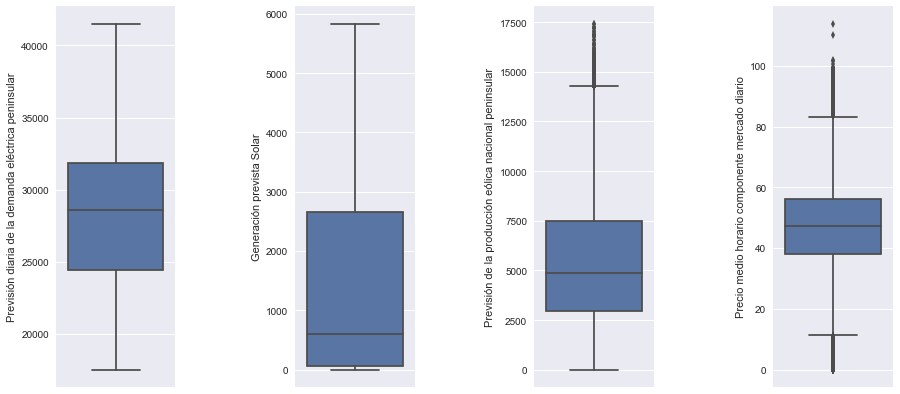

In [85]:
fig, axs = plt.subplots(ncols=4,figsize=(15,7))
plt.subplots_adjust(wspace=1, hspace=None)
sns.boxplot(df_ree['Previsión diaria de la demanda eléctrica peninsular'], orient='v', ax=axs[0])
sns.boxplot(df_ree['Generación prevista Solar'], orient='v', ax=axs[1])
sns.boxplot(df_ree['Previsión de la producción eólica nacional peninsular'], orient='v', ax=axs[2])
sns.boxplot(df_ree['Precio medio horario componente mercado diario'], orient='v', ax=axs[3])
plt.show()

##### 2a.Turning point: How to Deal with **Outliers**.

In [86]:
df_ree.describe()

,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
count,35060.000000,35060.000000,35060.000000,35060.000000
mean,28367.534370,1452.525579,5508.535582,46.087025
std,4573.639127,1687.210139,3248.543320,15.706695
min,17534.000000,0.000000,12.600000,0.000000
25%,24461.500000,66.800000,2972.000000,38.200000
50%,28597.500000,591.200000,4885.000000,47.210000
75%,31848.250000,2665.325000,7491.000000,56.190000
max,41514.000000,5835.900000,17430.000000,113.920000


Calculate Interquantile range as the difference between upper and lower quartiles (`IQR = Q3 - Q1`)

In [87]:
Q1 = df_ree.quantile(0.25)
Q3 = df_ree.quantile(0.75)
IQR = Q3 - Q1

In [88]:
IQR

Previsión diaria de la demanda eléctrica peninsular      7386.750
Generación prevista Solar                                2598.525
Previsión de la producción eólica nacional peninsular    4519.000
Precio medio horario componente mercado diario             17.990
dtype: float64

Calculate the number of outliers for each DataFrame `'df_ree'` series.

In [89]:
# 'Previsión diaria de la demanda eléctrica peninsular' Outliers:
numOutliersQ1 = df_ree['Previsión diaria de la demanda eléctrica peninsular'][df_ree['Previsión diaria de la demanda eléctrica peninsular']<(Q1.iloc[0] - 1.5 * IQR.iloc[0])].count()
numOutliersQ3 = df_ree['Previsión diaria de la demanda eléctrica peninsular'][df_ree['Previsión diaria de la demanda eléctrica peninsular']>(Q3.iloc[0] + 1.5 * IQR.iloc[0])].count()
numOutliersDemanda = numOutliersQ1 + numOutliersQ3
numOutliersDemanda

0

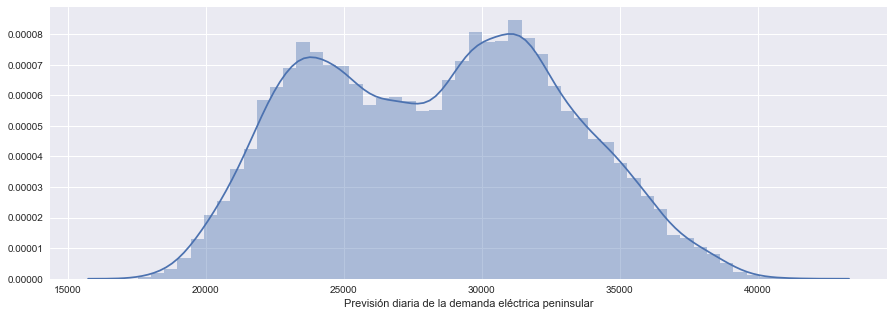

In [90]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.distplot(df_ree['Previsión diaria de la demanda eléctrica peninsular'])
plt.show()

In [91]:
# 'Generación prevista Solar' Outliers:
numOutliersQ1 = df_ree['Generación prevista Solar'][df_ree['Generación prevista Solar']<(Q1.iloc[1] - 1.5 * IQR.iloc[1])].count()
numOutliersQ3 = df_ree['Generación prevista Solar'][df_ree['Generación prevista Solar']>(Q3.iloc[1] + 1.5 * IQR.iloc[1])].count()
numOutliersSolar = numOutliersQ1 + numOutliersQ3
numOutliersSolar

0

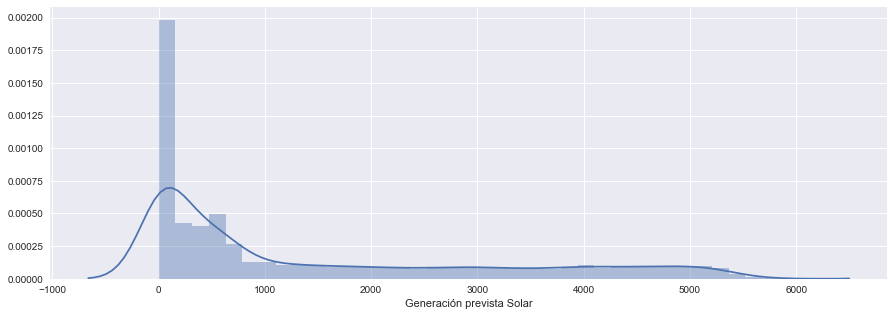

In [92]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.distplot(df_ree['Generación prevista Solar'])
plt.show()

In [93]:
# 'Previsión de la producción eólica nacional peninsular' Outliers
numOutliersQ1 = df_ree['Previsión de la producción eólica nacional peninsular'][df_ree['Previsión de la producción eólica nacional peninsular']<(Q1.iloc[2] - 1.5 * IQR.iloc[2])].count()
numOutliersQ3 = df_ree['Previsión de la producción eólica nacional peninsular'][df_ree['Previsión de la producción eólica nacional peninsular']>(Q3.iloc[2] + 1.5 * IQR.iloc[2])].count()
numOutliersEolica = numOutliersQ1 + numOutliersQ3
numOutliersEolica

340

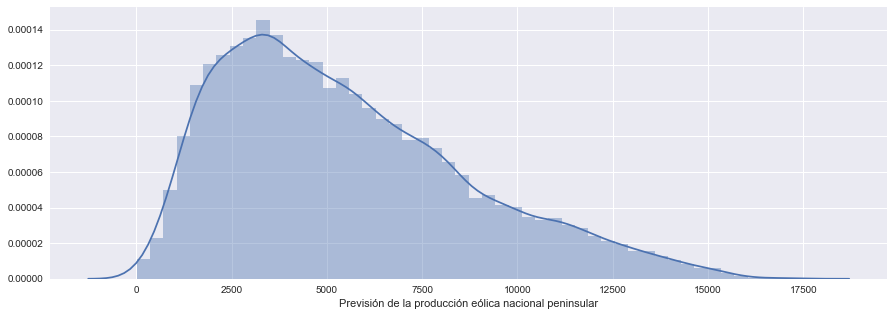

In [94]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.distplot(df_ree['Previsión de la producción eólica nacional peninsular'])
plt.show()

In [95]:
# 'Precio medio horario componente mercado diario' Outliers
numOutliersQ1 = df_ree['Precio medio horario componente mercado diario'][df_ree['Precio medio horario componente mercado diario']<(Q1.iloc[3] - 1.5 * IQR.iloc[3])].count()
numOutliersQ3 = df_ree['Precio medio horario componente mercado diario'][df_ree['Precio medio horario componente mercado diario']>(Q3.iloc[3] + 1.5 * IQR.iloc[3])].count()
numOutliersPrecio = numOutliersQ1 + numOutliersQ3
numOutliersPrecio

1559

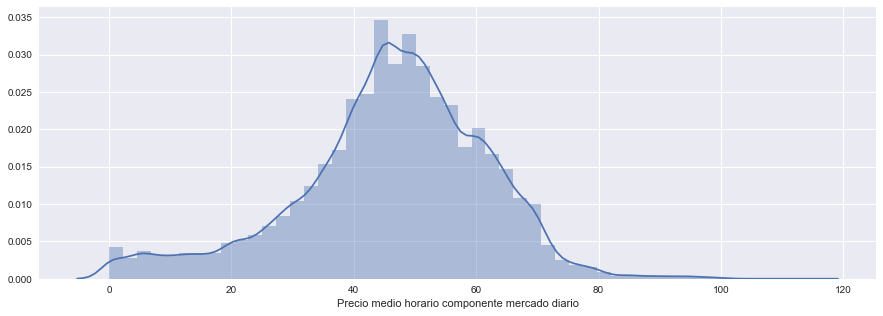

In [96]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.distplot(df_ree['Precio medio horario componente mercado diario'])
plt.show()

In `'Previsión diaria de la demanda eléctrica peninsular'` series -> 0 outliers.<br>
In `'Generación prevista Solar'` series -> 0 outliers.<br>
In `'Previsión de la producción eólica nacional peninsular'` series -> 340 outliers (0,97% of data are outliers).<br>
In `'Precio medio horario componente mercado diario'` series -> 1559 outliers (4,45% of data are outliers).<br>

**Outliers: To drop or not to drop**.<br>
>The base model used in Random Forest is a large decision tree. Decision trees are robust to outliers, because they isolate them in small regions of the feature space. Then, since the prediction for each leaf is the average (in the case of regression), being isolated in separate leaves, outliers won't influence the rest of the predictions (in the case of regression for instance, they would not impact the mean of the other leaves).<br>
**Conclusion:** Dont' care about Outliers in Random Forest.

#### 3. Merge DataFrames

Merge both Daraframes (`'df_fecha'` and `'df_ree'`) in a single DataFrame (`'df'`).

In [97]:
frames = [df_fecha, df_ree]

In [98]:
# Import reduce library
from functools import reduce

In [99]:
df = reduce(lambda left,right: pd.merge(left,right,on='Fecha'), frames)

In [100]:
df.sample(5)

,Fecha,Festivo,Fin de semana,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario
28692,2017-04-10 16:00:00,0,0,28559.0,5163.9,3274.0,49.50
22829,2016-08-09 08:00:00,0,0,28274.0,895.3,6726.0,44.80
31301,2017-07-28 09:00:00,0,0,33752.0,2467.7,1431.0,54.91
16134,2015-11-04 08:00:00,0,0,29920.0,284.2,5100.0,49.76
19382,2016-03-18 16:00:00,0,0,31681.0,1447.6,2674.0,45.02


Create four new series from `'Fecha'` serie.

In [101]:
df['Hora'] = df['Fecha'].dt.hour
df['Dia'] = df['Fecha'].dt.day
df['Mes'] = df['Fecha'].dt.month
df['Dia semana'] = df['Fecha'].dt.weekday

In [102]:
df.dtypes

Fecha                                                    datetime64[ns]
Festivo                                                           int64
Fin de semana                                                     int64
Previsión diaria de la demanda eléctrica peninsular             float64
Generación prevista Solar                                       float64
Previsión de la producción eólica nacional peninsular           float64
Precio medio horario componente mercado diario                  float64
Hora                                                              int64
Dia                                                               int64
Mes                                                               int64
Dia semana                                                        int64
dtype: object

Plot `'Precio medio horario componente mercado diario'` series trend in four years.

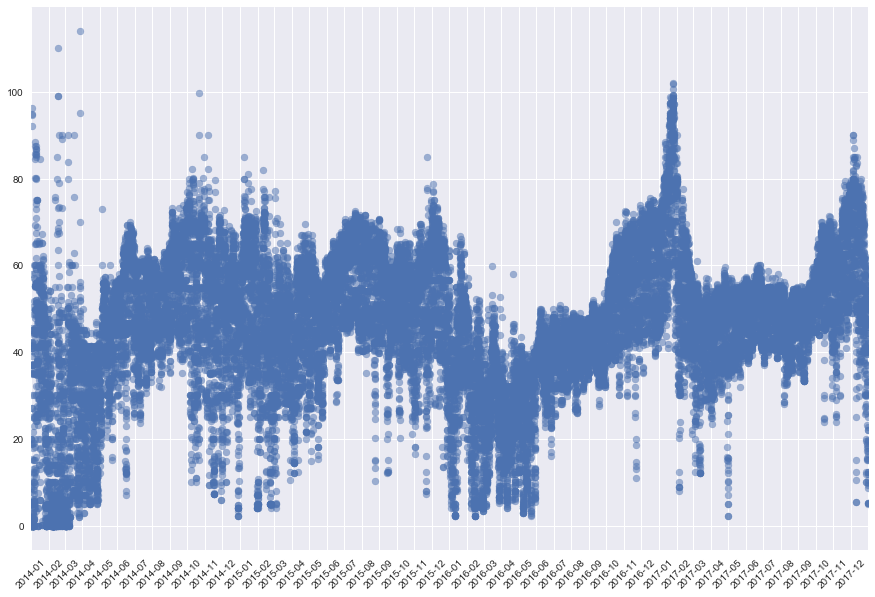

In [103]:
ax = plt.figure(figsize=(15,10)).add_subplot(111)
plt.scatter(df['Fecha'].tolist(), df['Precio medio horario componente mercado diario'],alpha=0.5) 
plt.xlim([datetime.date(2014, 1, 1), datetime.date(2017, 12, 31)])
ax.xaxis.set_major_locator(dates.MonthLocator())
hfmt = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(hfmt)
plt.xticks(rotation=45)
plt.show()

Export `"df"` DataFrame to a `".csv"` file.

In [104]:
df.to_csv('Data/DataFrame.csv', sep = '^', index = False)

#### 4. Modeling

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

First of all, It's necessary to drop NaN's values, in case there are.

In [106]:
filtered_df = df.dropna()

This is the correlation matrix between variables:

In [107]:
corr = filtered_df.corr()
corr

,Festivo,Fin de semana,Previsión diaria de la demanda eléctrica peninsular,Generación prevista Solar,Previsión de la producción eólica nacional peninsular,Precio medio horario componente mercado diario,Hora,Dia,Mes,Dia semana
Festivo,1.000000,-0.014048,-0.075688,-0.006253,-0.009295,-0.025638,-0.000028,-0.093324,-0.046484,0.011750
Fin de semana,-0.014048,1.000000,-0.390982,-0.005910,0.039296,-0.223949,0.000247,-0.000594,-0.000512,0.790527
Previsión diaria de la demanda eléctrica peninsular,-0.075688,-0.390982,1.000000,0.384289,0.051393,0.468065,0.546193,0.012326,-0.073439,-0.316450
Generación prevista Solar,-0.006253,-0.005910,0.384289,1.000000,-0.171586,0.086728,0.258658,-0.008578,-0.013459,-0.005519
Previsión de la producción eólica nacional peninsular,-0.009295,0.039296,0.051393,-0.171586,1.000000,-0.474751,0.059120,-0.022193,-0.276652,0.022493
Precio medio horario componente mercado diario,-0.025638,-0.223949,0.468065,0.086728,-0.474751,1.000000,0.258922,0.034189,0.359370,-0.181284
Hora,-0.000028,0.000247,0.546193,0.258658,0.059120,0.258922,1.000000,0.000218,-0.000160,0.000235
Dia,-0.093324,-0.000594,0.012326,-0.008578,-0.022193,0.034189,0.000218,1.000000,0.010687,-0.000497
Mes,-0.046484,-0.000512,-0.073439,-0.013459,-0.276652,0.359370,-0.000160,0.010687,1.000000,-0.001574
Dia semana,0.011750,0.790527,-0.316450,-0.005519,0.022493,-0.181284,0.000235,-0.000497,-0.001574,1.000000


And this is the same correlation matrix in heatmap format:

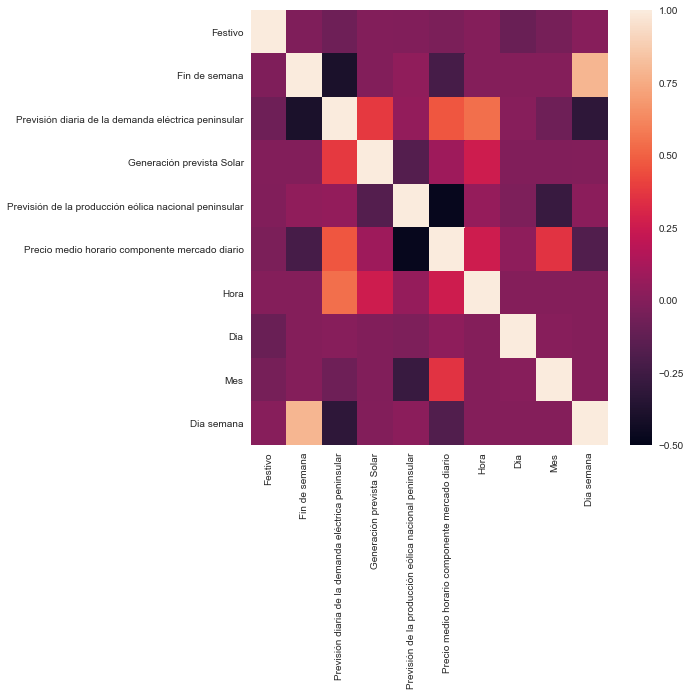

In [108]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, vmin=-0.5, vmax=1)
plt.show()

In [109]:
X = filtered_df[['Hora',
                 'Dia',
                 'Mes',
                 'Dia semana',
                 'Festivo', 
                 'Fin de semana', 
                 'Previsión diaria de la demanda eléctrica peninsular',
                 'Generación prevista Solar',
                 'Previsión de la producción eólica nacional peninsular']].values
y = filtered_df['Precio medio horario componente mercado diario']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [111]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28048, 9) (28048,) (7012, 9) (7012,)


##### 4.1. Chosing Model: Random forest Regresor With RandomizedSearchCV

To implement the model is used a supervised learning algorithm called **Random Forest** algorithm. The Random Forest is an ensemble of Decision Trees, trained with the “bagging” method, which means that the process of finding the root node and splitting the feature nodes will run randomly.<br>
The Random Forest algorithm is considered one of the most effective machine learning models for predictive analytics and can be used for identifying the most important features from the training dataset.<br>
**RandomizedSearchCV** is used to tune the best hyperparameters, exploring possible hyperparameter values using some search algorithm. For each set of hyperparameter values, train the model and estimate its generalization performance. Choose the hyperparameters that optimize this estimate. Finally, estimate the generalization performance of the final, tuned model on an independent data set. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

In [112]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 46.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

The parameters selected are those that maximize the score of the data:

In [53]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [113]:
# Identify optimal hyperparameter values
best_bootstrap = rf_random.best_params_['bootstrap']
best_max_depth = rf_random.best_params_['max_depth']
best_max_features = rf_random.best_params_['max_features'] 
best_min_samples_leaf = rf_random.best_params_['min_samples_leaf'] 
best_min_samples_split = rf_random.best_params_['min_samples_split'] 
best_n_estimators = rf_random.best_params_['n_estimators']

Once the best parameters are selected, the model is implemented.

In [114]:
rf_model = RandomForestRegressor(random_state=42,
                                 bootstrap=best_bootstrap,
                                 max_depth=best_max_depth,
                                 max_features=best_max_features,
                                 min_samples_leaf=best_min_samples_leaf,
                                 min_samples_split=best_min_samples_split,
                                 n_estimators=best_n_estimators)

#### 4.2. Training Model

Train the Random Forest Regressor model.

In [115]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#### 4.3. Testing Model

Calculate the **Coefficient of Determination R^2** of the prediction (metric by default).

In [116]:
rf_model.score(X_test, y_test) 

0.84724949857054177

### Model Result
>Score: 0.8472

#### 4.4. Calculate predicted values

In [117]:
rf_prediction = rf_model.predict(X_test)

In [118]:
rf_prediction

array([ 55.875925,  30.502   ,  16.217625, ...,  33.5115  ,  41.453975,
        14.450125])

Some other metrics:

In [119]:
# Import libraries
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

In [120]:
spearman = spearmanr(y_test, rf_prediction)
pearson = pearsonr(y_test, rf_prediction)
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data Spearman correlation: 0.912
Test data Pearson correlation: 0.923


Plot the relation between `"y_test"` and `"rf_prediction"`

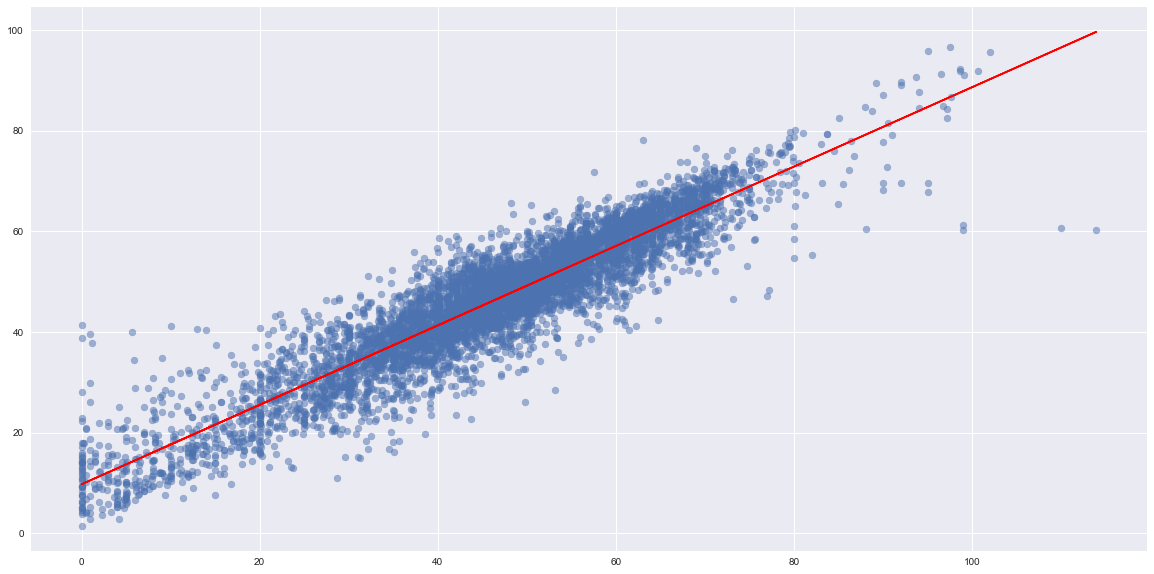

In [121]:
from numpy.polynomial.polynomial import polyfit
plt.figure(figsize=(20,10))
plt.scatter(y_test, rf_prediction, alpha = 0.5)
b, m = polyfit(y_test, rf_prediction, 1)
plt.plot(y_test, b + m * y_test, '-', color='red')
plt.show()

##### 5. Export

Write the result in a `.csv` file

Create a new DataFrame (`'df_result'`) formed by two DataFrames. One contains the number of samples and the real value of the test set samples (`'df_y_test'`), and the other DataFrame is the result of the model, the prediction (`'df_prediction'`).

In [122]:
df_y_test = pd.DataFrame(y_test.reset_index())
df_prediction = pd.DataFrame({'Prediction': rf_prediction})
df_result = pd.merge(df_y_test, df_prediction, left_index=True, right_index=True)
df_result.columns = ['Numero de Muestra','Precio medio horario componente mercado diario','Prediction']

In [123]:
df_result

,Numero de Muestra,Precio medio horario componente mercado diario,Prediction
0,4903,54.87,55.875925
1,18742,27.90,30.502000
2,27674,35.09,16.217625
3,1483,4.50,11.817125
4,11505,49.80,45.394475
5,4605,49.56,45.096875
6,14827,65.60,61.990700
7,19110,35.10,35.536175
8,26307,44.50,43.553875
9,32726,49.81,51.245925


Export prediction to `".csv"` file.

In [66]:
df_result.to_csv('Data/Prediction_Results.csv', sep = '^', index = False)